# 1. A Single Neuron

## Introduction

In this exercise, you'll build a linear model and get some practice working with models in Keras.

In [327]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
      titleweight='bold', titlesize=18, titlepad=10)

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro import ex1

In [328]:
import pandas as pd

red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')
red_wine.head() # display first rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [329]:
red_wine.shape # 데이터의 (rows, columns)

(1599, 12)

## 1) Input shape

In [330]:
input_shape = [11]

ex1.q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

## 2) Define a linear model

In [331]:
from tensorflow import keras
from tensorflow.keras import layers

ex1.q_2.hint()

model = keras.Sequential([
    layers.Dense(units=1, input_shape=[11])
])

ex1.q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Your answer should look something like:
```python
model = keras.Sequential([
    ____
])
```


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

## 3) Look at the weights

In [332]:
w, b = model.weights # w와 b에 접근 
ex1.q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> Do you see how there's one weight for each input (and a bias)? Notice though that there doesn't seem to be any pattern to the values the weights have. Before the model is trained, the weights are set to random numbers (and the bias to 0.0). A neural network learns by finding better values for its weights.


## Plot the output of an untrained linear model

4/4 [==============================] - 0s 2ms/step


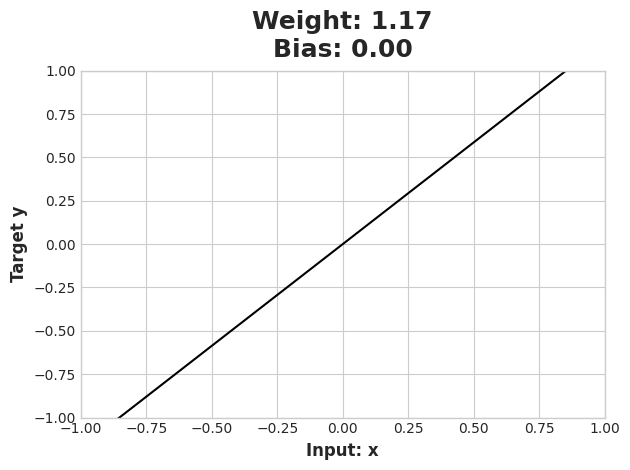

In [333]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
# x와 y의 범위
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # model.get_weights()
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()



# 2. Deep Neural Networks

## Introduction

In these exercises, you'll build a neural network with several hidden layers and then explore some activation functions beyond ReLU.

In [334]:
# 1과 동일
import tensorflow as tf

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro import ex2

In [335]:
import pandas as pd

# concrete 데이터 불러오기
concrete = pd.read_csv('../input/dl-course-data/concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## 1) Input Shape

In [336]:
input_shape = [8]
ex2.q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

## 2) Define a Model with Hidden Layers

In [337]:
from tensorflow import keras
from tensorflow.keras import layers

model = model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[8]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),    
    layers.Dense(units=1),
])

## Alternatives to ReLU

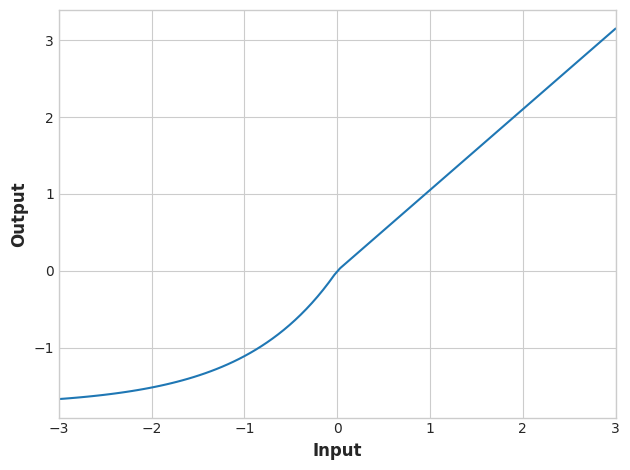

In [338]:
activation_layer = layers.Activation('selu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # 한 번 선언해두면 함수처럼 호출할 수 있음

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

# 3. Stochastic Gradient Descent

## Introduction

In this exercise you'll train a neural network on the Fuel Economy dataset and then explore the effect of the learning rate and batch size on SGD.

In [339]:
# Setup plotting
import matplotlib.pyplot as plt
from learntools.deep_learning_intro.dltools import animate_sgd
plt.style.use('seaborn-v0_8-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro import ex3

## Load Dataset

In [340]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('../input/dl-course-data/fuel.csv')

X = fuel.copy()
# Remove target
y = X.pop('FE') # column

preprocessor = make_column_transformer(
    (StandardScaler(),
    make_column_selector(dtype_include = np.number)),
    (OneHotEncoder(sparse=False),
    make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y)

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [341]:
# Uncomment to see original data
fuel.head()
# Uncomment to see processed features
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [342]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

## 1) Add Loss and Optimizer

In [343]:
# Using the model's compile method, add the Adam optimizer and MAE loss.
ex3.q_1.hint()

model.compile(
    optimizer='adam',
    loss='mae'
)

ex3.q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Your code should look something like:
```python
model.compile(
____,
____,
)
```


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

## 2) Train Model

In [344]:
# Train the network for 200 epochs with a batch size of 128
history = model.fit(X, y, epochs=200, batch_size=128)

ex3.q_2.check()

Epoch 1/200
9/9 [==============================] - 1s 3ms/step - loss: 2.7609
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 0.9647
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 0.5179
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 0.3267
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 0.2199
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 0.1751
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 0.1359
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1111
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0985
Epoch 10/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0840
Epoch 11/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0769
Epoch 12/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0713
Epoch 13/200
9/9 [==============================] - 0s 3ms/st

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

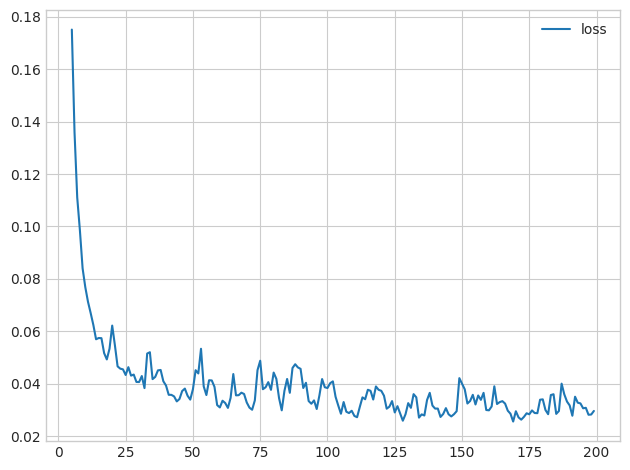

In [345]:
import pandas as pd

history_df = pd.DataFrame(history.history)

history_df.loc[5:, ['loss']].plot();

## 3) Evaluate Training

In [346]:
learning_rate = 0.7
batch_size = 32
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    steps=50, # total training steps
    true_w=3.0, # slope of the data
    true_b=2.0, # bias of the data
)

## 4) Learning Rate and Batch Size

In [347]:
ex3.q_4.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 


You probably saw that smaller batch sizes gave noisier weight updates and loss curves. This is because each batch is a small *sample* of data and smaller samples tend to give noisier estimates. Smaller batches can have an "averaging" effect though which can be beneficial.

Smaller learning rates make the updates smaller and the training takes longer to converge. Large learning rates can speed up training, but don't "settle in" to a minimum as well. When the learning rate is too large, the training can fail completely. (Try setting the learning rate to a large value like 0.99 to see this.)


# 4. Overfitting and Underfitting

## Introduction

In this exercise, you’ll learn how to improve training outcomes by including an early stopping callback to prevent overfitting.

In [348]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
        titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro import ex4

In [349]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

# spotify data
spotify = pd.read_csv('../input/dl-course-data/spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


Minimum Validation Loss: 0.1928


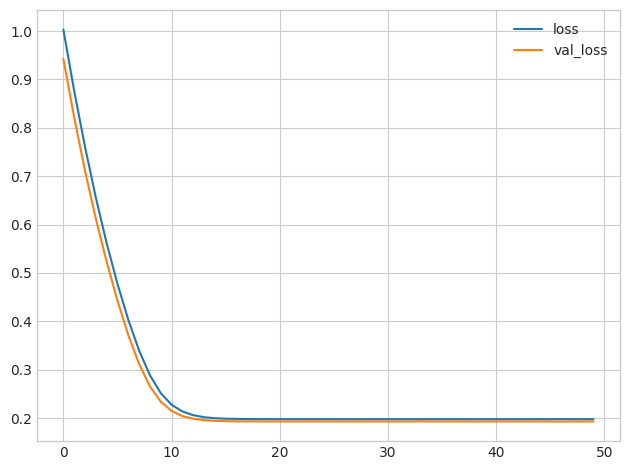

In [350]:
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape)
])

model.compile(   
    optimizer='adam',
    loss='mae'
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0, # suppress output since we'll plot the curves
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));


Minimum Validation Loss: 0.1928


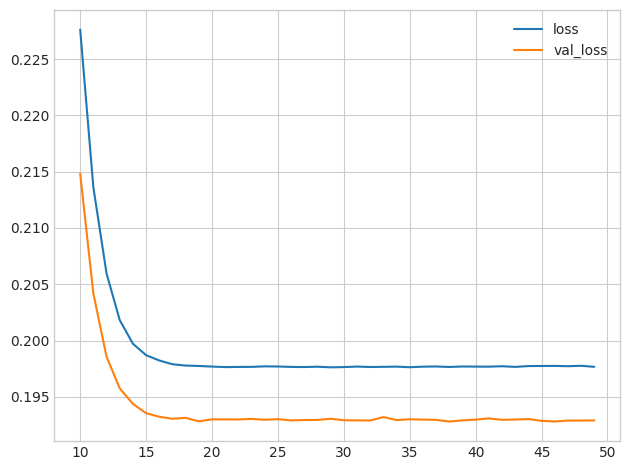

In [351]:
# Epoch 10에서 plot 시작
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

## 1) Evaluate BaseLine

In [352]:
ex4.q_1.check()
ex4.q_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The gap between these curves is quite small and the validation loss never increases, so it's more likely that the network is underfitting than overfitting. It would be worth experimenting with more capacity to see if that's the case.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> The gap between these curves is quite small and the validation loss never increases, so it's more likely that the network is underfitting than overfitting. It would be worth experimenting with more capacity to see if that's the case.

Epoch 1/50
49/49 [==============================] - 1s 8ms/step - loss: 0.2571 - val_loss: 0.2021
Epoch 2/50
49/49 [==============================] - 0s 4ms/step - loss: 0.2032 - val_loss: 0.1968
Epoch 3/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1976 - val_loss: 0.1944
Epoch 4/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1943 - val_loss: 0.1937
Epoch 5/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1923 - val_loss: 0.1940
Epoch 6/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1906 - val_loss: 0.1941
Epoch 7/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1894 - val_loss: 0.1938
Epoch 8/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1886 - val_loss: 0.1941
Epoch 9/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1875 - val_loss: 0.1941
Epoch 10/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1869 - val_loss: 0.1937
Epoch 11/50
49/49 [

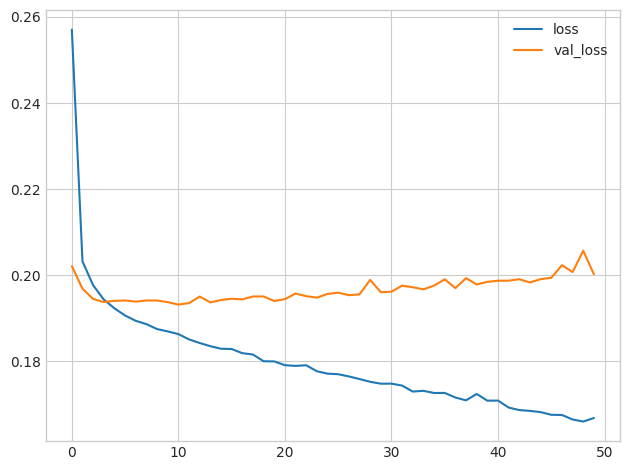

In [353]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

## 2) Add Capacity

In [354]:
# overfitting
ex4.q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The gap between these curves is quite small and the validation loss never increases, so it's more likely that the network is underfitting than overfitting. It would be worth experimenting with more capacity to see if that's the case.

## 3) Define Early Stopping callback

In [355]:
from tensorflow.keras import callbacks

# YOUR CODE HERE: define an early stopping callback
early_stopping = early_stopping = callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True
)

# Check your answer
ex4.q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

Epoch 1/50
49/49 [==============================] - 1s 7ms/step - loss: 0.2246 - val_loss: 0.1995
Epoch 2/50
49/49 [==============================] - 0s 4ms/step - loss: 0.2002 - val_loss: 0.1954
Epoch 3/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1957 - val_loss: 0.1926
Epoch 4/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1936 - val_loss: 0.1954
Epoch 5/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1916 - val_loss: 0.1934
Epoch 6/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1900 - val_loss: 0.1922
Epoch 7/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1888 - val_loss: 0.1933
Epoch 8/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1878 - val_loss: 0.1937
Minimum Validation Loss: 0.1922


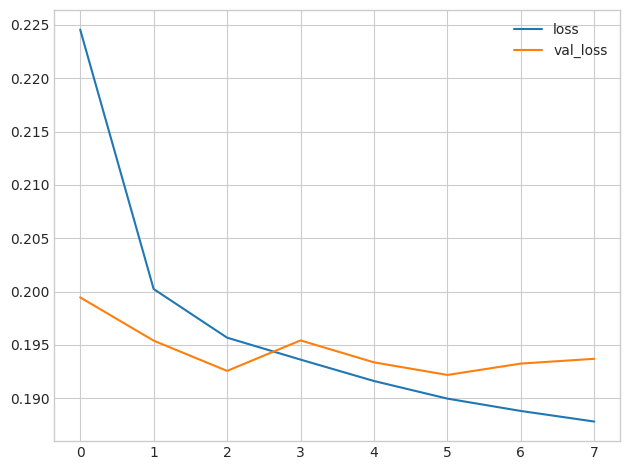

In [356]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [357]:
ex4.q_4.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The early stopping callback did stop the training once the network began overfitting. Moreover, by including `restore_best_weights` we still get to keep the model where validation loss was lowest.

# 5) Dropout and Batch Normalization

## Introduction

In this exercise, you'll add dropout to the Spotify model from Exercise 4 and see how batch normalization can let you successfully train models on difficult datasets.

In [358]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro import ex5

In [359]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

# import spotify data
spotify = pd.read_csv('../input/dl-course-data/spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

# define features
features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                 'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


## 1) Add Dropout to Spotify Model

In [360]:
# Add two 30% dropout layers, one after 128 and one after 64
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

ex5.q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

Minimum Validation Loss: 0.1875


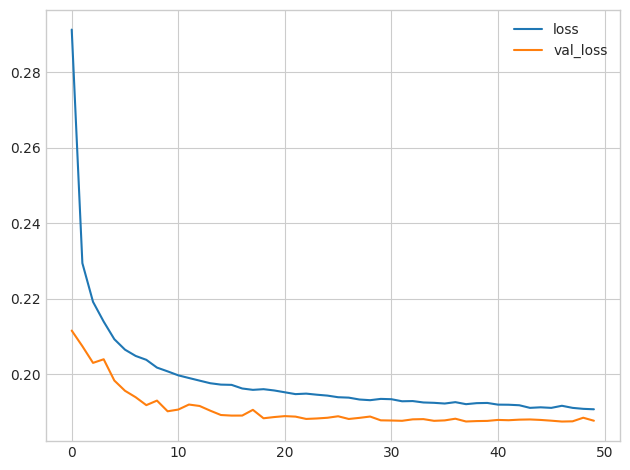

In [361]:
model.compile(
    optimizer='adam',
    loss='mae'
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))


## 2) Evaluate Dropout

In [362]:
import pandas as pd

concrete = pd.read_csv('../input/dl-course-data/concrete.csv')
df = concrete.copy()

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

X_train = df_train.drop('CompressiveStrength', axis=1)
X_valid = df_valid.drop('CompressiveStrength', axis=1)
y_train = df_train['CompressiveStrength']
y_valid = df_valid['CompressiveStrength']

input_shape = [X_train.shape[1]]

Minimum Validation Loss: nan


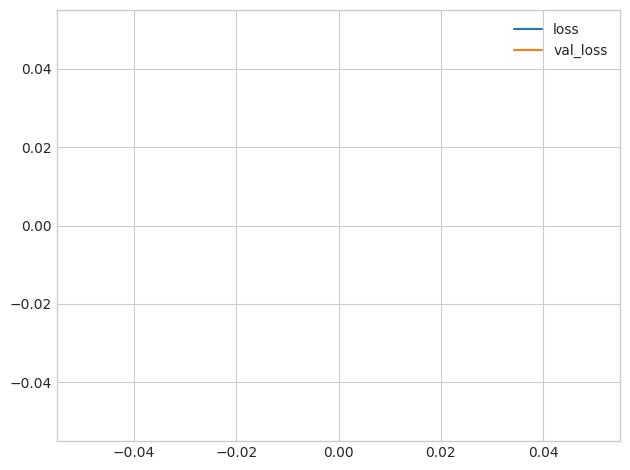

In [363]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),    
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer='sgd', # SGD is more sensitive to differences of scale
    loss='mae',
    metrics=['mae'],
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=100,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

## 3) Add Batch Normalization Layers

In [364]:
# Add four BatchNormalization layers, one before each of the dense layers.
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])

# Check your answer
ex5.q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

Minimum Validation Loss: 3.7112


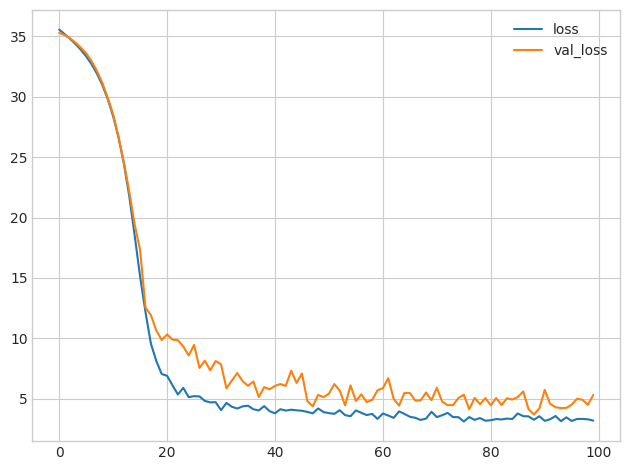

In [365]:
model.compile(
    optimizer='sgd',
    loss='mae',
    metrics=['mae'],
)

EPOCHS = 100

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=EPOCHS,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

## 4) Evaluate Batch Normalization

In [366]:
q_4.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 


You probably saw that smaller batch sizes gave noisier weight updates and loss curves. This is because each batch is a small *sample* of data and smaller samples tend to give noisier estimates. Smaller batches can have an "averaging" effect though which can be beneficial.

Smaller learning rates make the updates smaller and the training takes longer to converge. Large learning rates can speed up training, but don't "settle in" to a minimum as well. When the learning rate is too large, the training can fail completely. (Try setting the learning rate to a large value like 0.99 to see this.)


# 6. Binary Classification

## Introduction
In this exercise, you'll build a model to predict hotel cancellations with a binary classifier.

In [367]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro import ex6

In [368]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('../input/dl-course-data/hotel.csv')

X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]

features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), 
    StandardScaler(),
)

transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

## 1) Define Model

The model we'll use this time will have both batch normalization and dropout layers. To ease reading we've broken the diagram into blocks, but you can define it layer by layer as usual.

Define a model with an architecture given by this diagram:

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/V04o59Z.png" width="400" alt="Diagram of network architecture: BatchNorm, Dense, BatchNorm, Dropout, Dense, BatchNorm, Dropout, Dense.">
<figcaption style="textalign: center; font-style: italic">

In [369]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

ex6.q_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])
q_1.assert_check_passed()

```

# 2) Add Optimizer, Loss, and Metric

In [370]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#cc3333">Incorrect:</span> You have the incorrect number of epochs. You gave 100, but there should be 200.

Epoch 1/200
175/175 [==============================] - 5s 17ms/step - loss: 0.4830 - binary_accuracy: 0.7698 - val_loss: 0.4335 - val_binary_accuracy: 0.8049
Epoch 2/200
175/175 [==============================] - 2s 14ms/step - loss: 0.4217 - binary_accuracy: 0.8022 - val_loss: 0.4046 - val_binary_accuracy: 0.8119
Epoch 3/200
175/175 [==============================] - 2s 14ms/step - loss: 0.4084 - binary_accuracy: 0.8080 - val_loss: 0.3953 - val_binary_accuracy: 0.8144
Epoch 4/200
175/175 [==============================] - 2s 14ms/step - loss: 0.4014 - binary_accuracy: 0.8125 - val_loss: 0.3911 - val_binary_accuracy: 0.8177
Epoch 5/200
175/175 [==============================] - 3s 15ms/step - loss: 0.3952 - binary_accuracy: 0.8174 - val_loss: 0.3866 - val_binary_accuracy: 0.8185
Epoch 6/200
175/175 [==============================] - 2s 14ms/step - loss: 0.3904 - binary_accuracy: 0.8183 - val_loss: 0.3844 - val_binary_accuracy: 0.8240
Epoch 7/200
175/175 [==============================]

<Axes: title={'center': 'Accuracy'}>

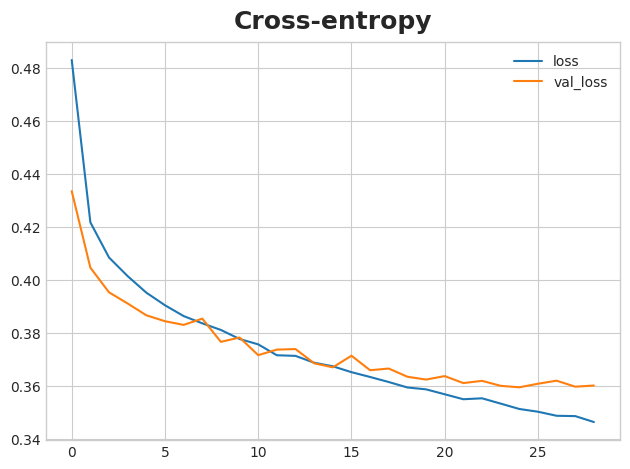

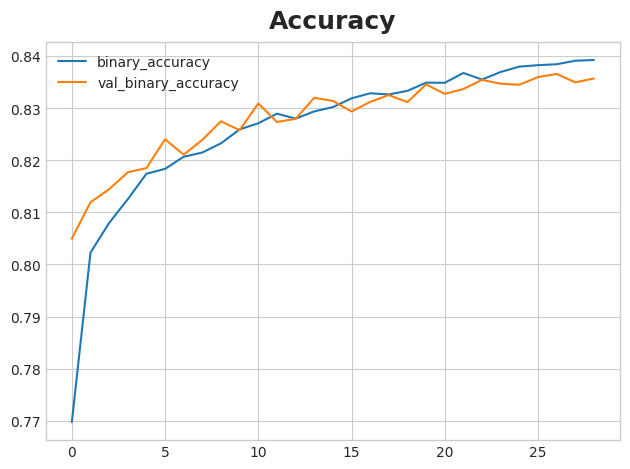

In [371]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

## 3) Train and Evaluate

In [372]:
ex6.q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Though we can see the training loss continuing to fall, the early stopping callback prevented any overfitting. Moreover, the accuracy rose at the same rate as the cross-entropy fell, so it appears that minimizing cross-entropy was a good stand-in. All in all, it looks like this training was a success!

# Conclusion

Congratulations! You've completed Kaggle's Introduction to Deep Learning course!